# Co-Registration

In [1]:
from plot_helpers import *
from source_files_extended import STABLE_GROUND, sfm_snow_free, sfm_snow_on, dem_co_reg
from raster_compare.base import RasterFile, MedianAbsoluteDeviation

figure_style= dict(
    figsize=(12, 10),
    dpi=150
)

### GeoTiff masked used to classify points in point cloud as stable ground

In [2]:
stable_ground = RasterFile(STABLE_GROUND, band_number=1)
stable_ground_values = stable_ground.band_values()
stable_ground_values = np.ma.masked_where(stable_ground_values == 0, stable_ground_values, copy=False)

sfm_snow_free_values = sfm_snow_free.band_values()
sfm_snow_on_values = sfm_snow_on.band_values()
dem_co_reg_values = dem_co_reg.band_values()

In [8]:
print(f"Percent of available: {stable_ground_values.count() / stable_ground_values.size:.2%}")

Percent of available: 13.90%


In [9]:
np.ma.masked_where(stable_ground_values.mask, sfm_snow_free_values, copy=False)
np.ma.masked_where(stable_ground_values.mask, sfm_snow_on_values, copy=False)

stable_ground_difference = sfm_snow_on_values - sfm_snow_free_values

In [10]:
mad = MedianAbsoluteDeviation(
    stable_ground_difference[np.isfinite(stable_ground_difference)].compressed()
)
"NMAD: {:.2f} m".format(mad.normalized())

'NMAD: 0.22 m'

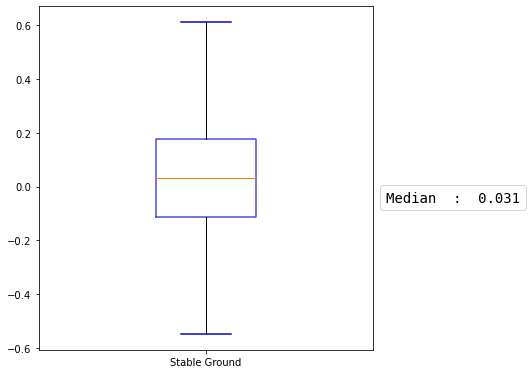

In [12]:
make_box_plot(stable_ground_difference, 'Stable Ground');

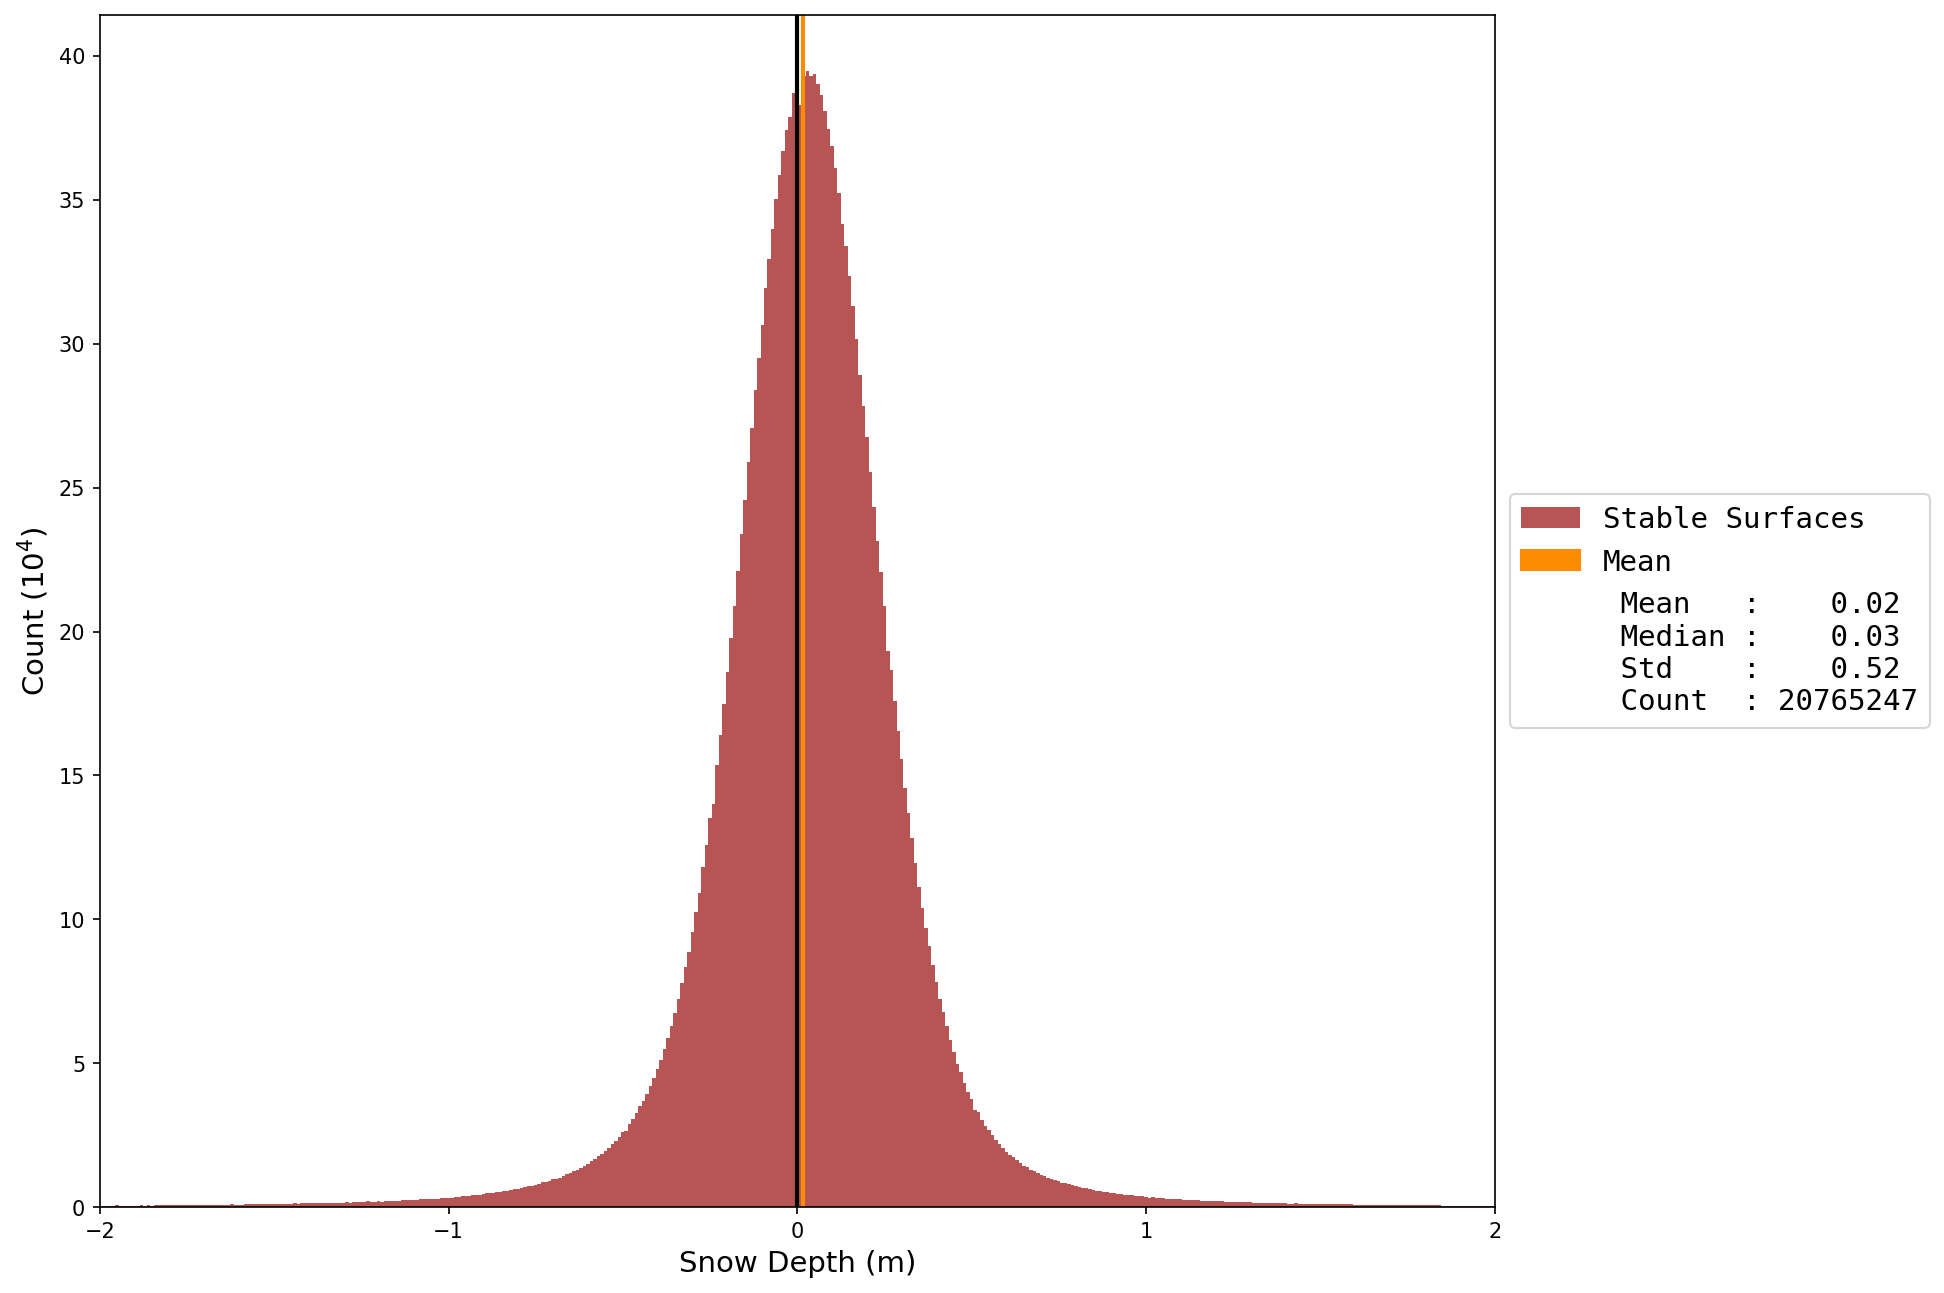

In [15]:
plot = plot_histogram(
    [{
        'data': stable_ground_difference,
        'label': 'Stable Surfaces',
        'color': 'brown',
    }],
    (-2, 2),
    **figure_style
)
with plot as ax:
     ax

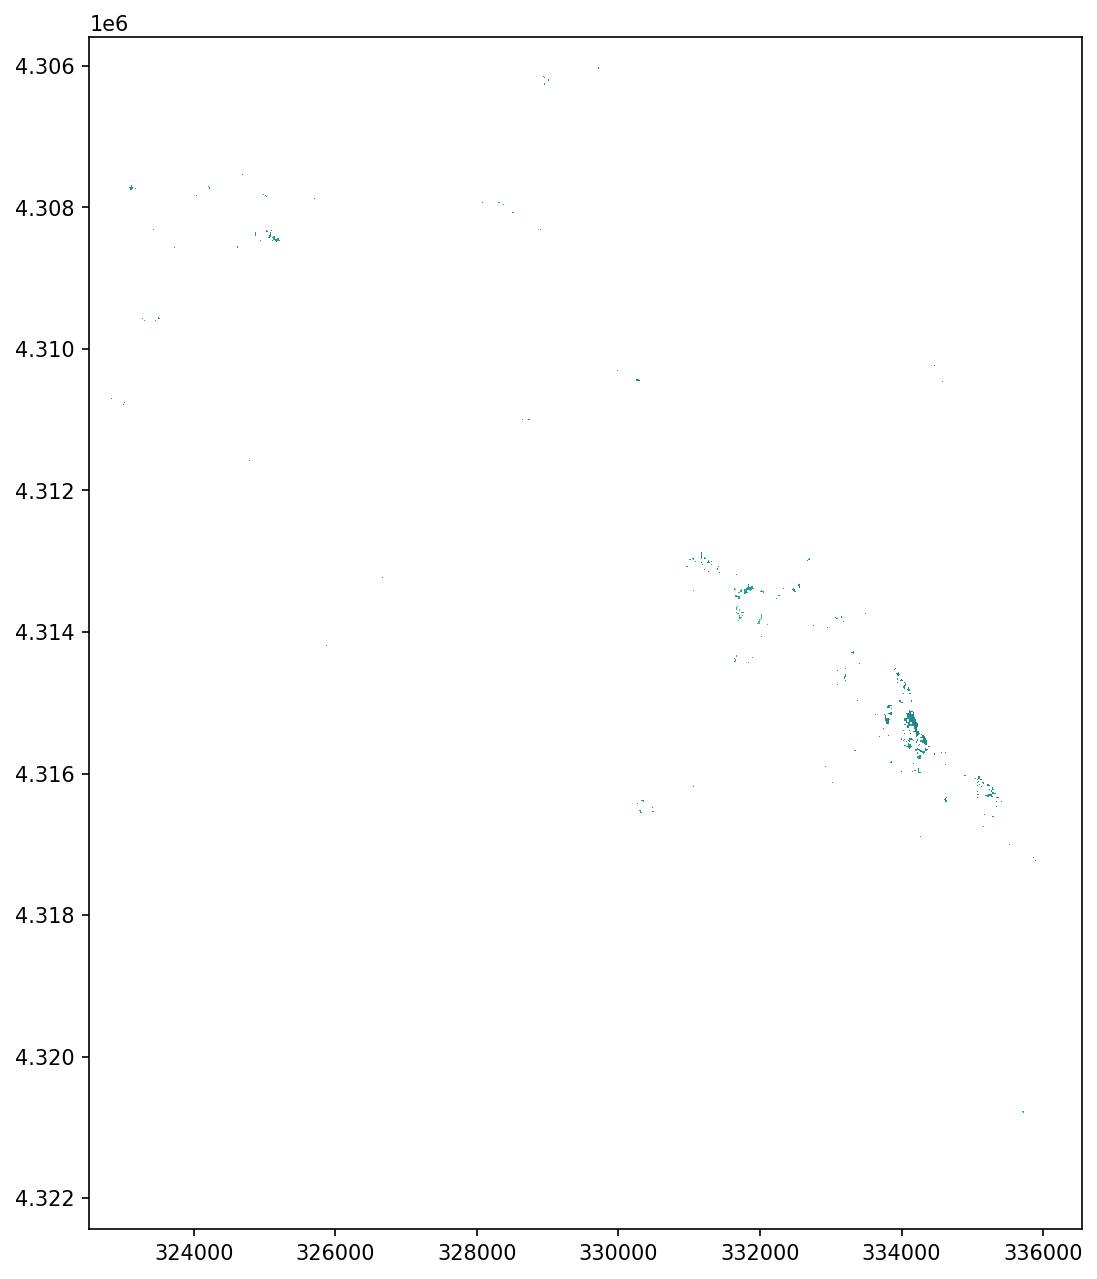

In [16]:
plt.figure(**figure_style)
plt.imshow(
    stable_ground_difference, 
    extent=stable_ground.extent,
#     cmap='Reds',
    vmin=-1,
    vmax=1,
);

In [18]:
stable_ground_snow_free = dem_co_reg_values - sfm_snow_free_values

mad = MedianAbsoluteDeviation(
    stable_ground_snow_free[np.isfinite(stable_ground_snow_free)].compressed()
)
"NMAD: {:.2f} m".format(mad.normalized())

'NMAD: 0.48 m'

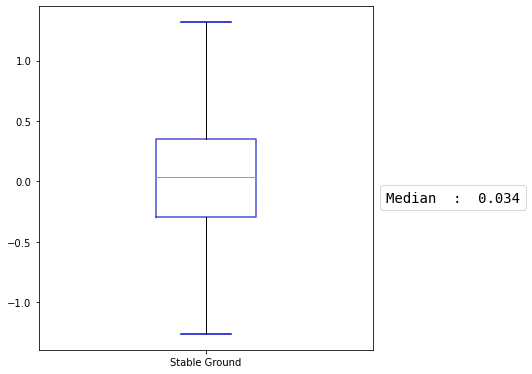

In [19]:
make_box_plot(stable_ground_snow_free, 'Stable Ground');

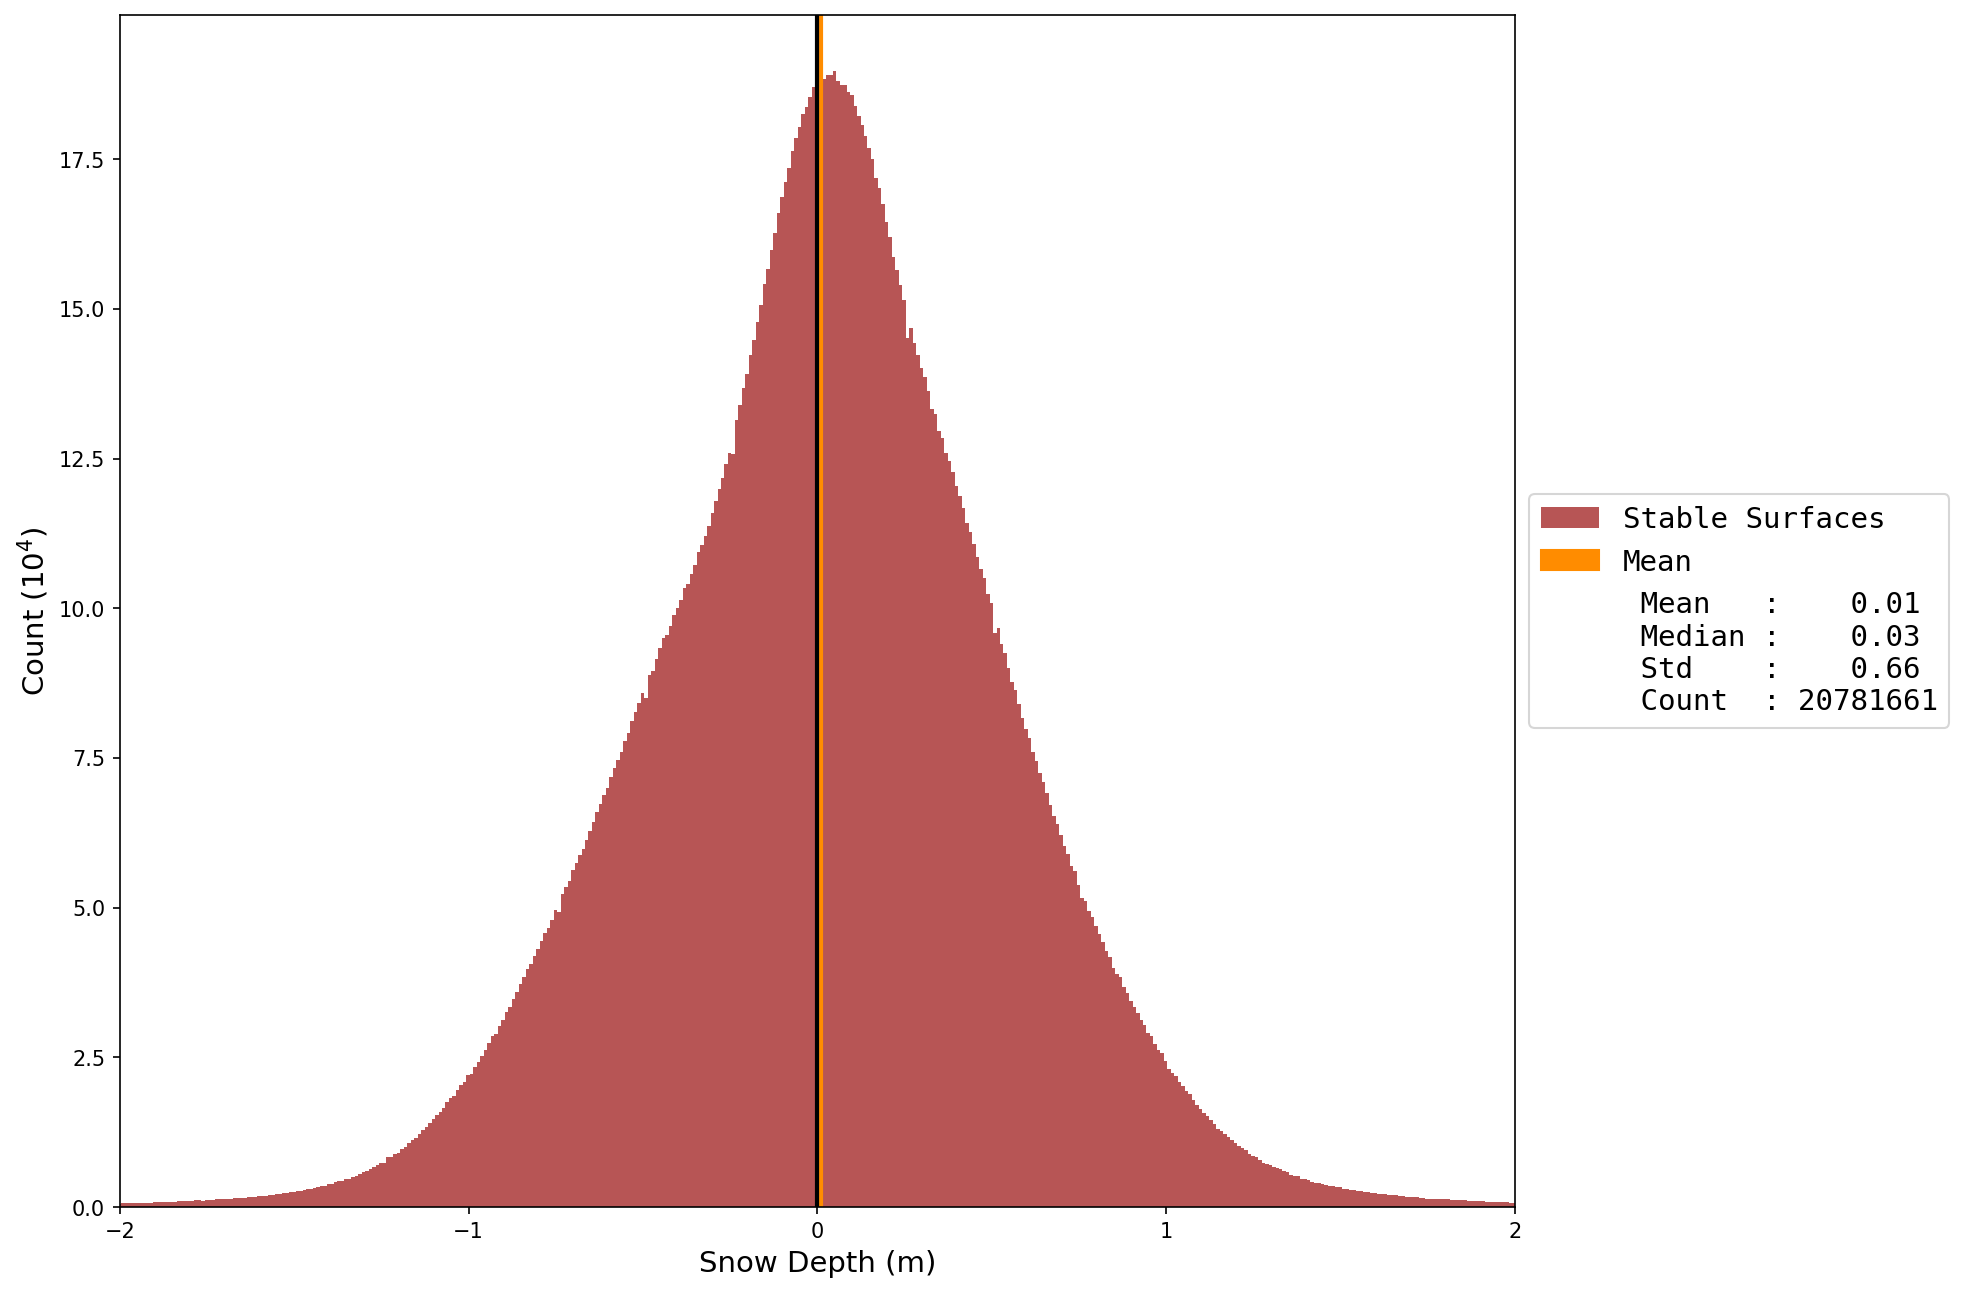

In [20]:
plot = plot_histogram(
    [{
        'data': stable_ground_snow_free,
        'label': 'Stable Surfaces',
        'color': 'brown',
    }],
    (-2, 2),
    **figure_style
)
with plot as ax:
     ax

In [21]:
stable_ground_snow_on = dem_co_reg_values - sfm_snow_on_values

mad = MedianAbsoluteDeviation(
    stable_ground_snow_on[np.isfinite(stable_ground_snow_on)].compressed()
)
"NMAD: {:.2f} m".format(mad.normalized())

'NMAD: 0.45 m'

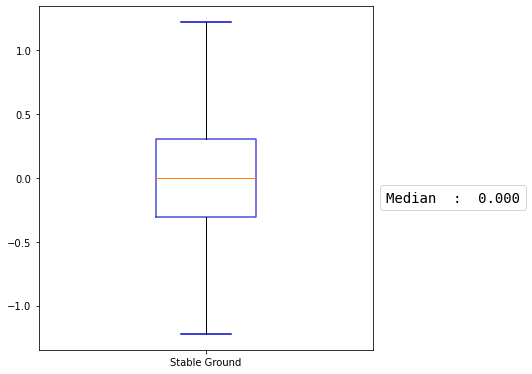

In [22]:
make_box_plot(stable_ground_snow_on, 'Stable Ground');

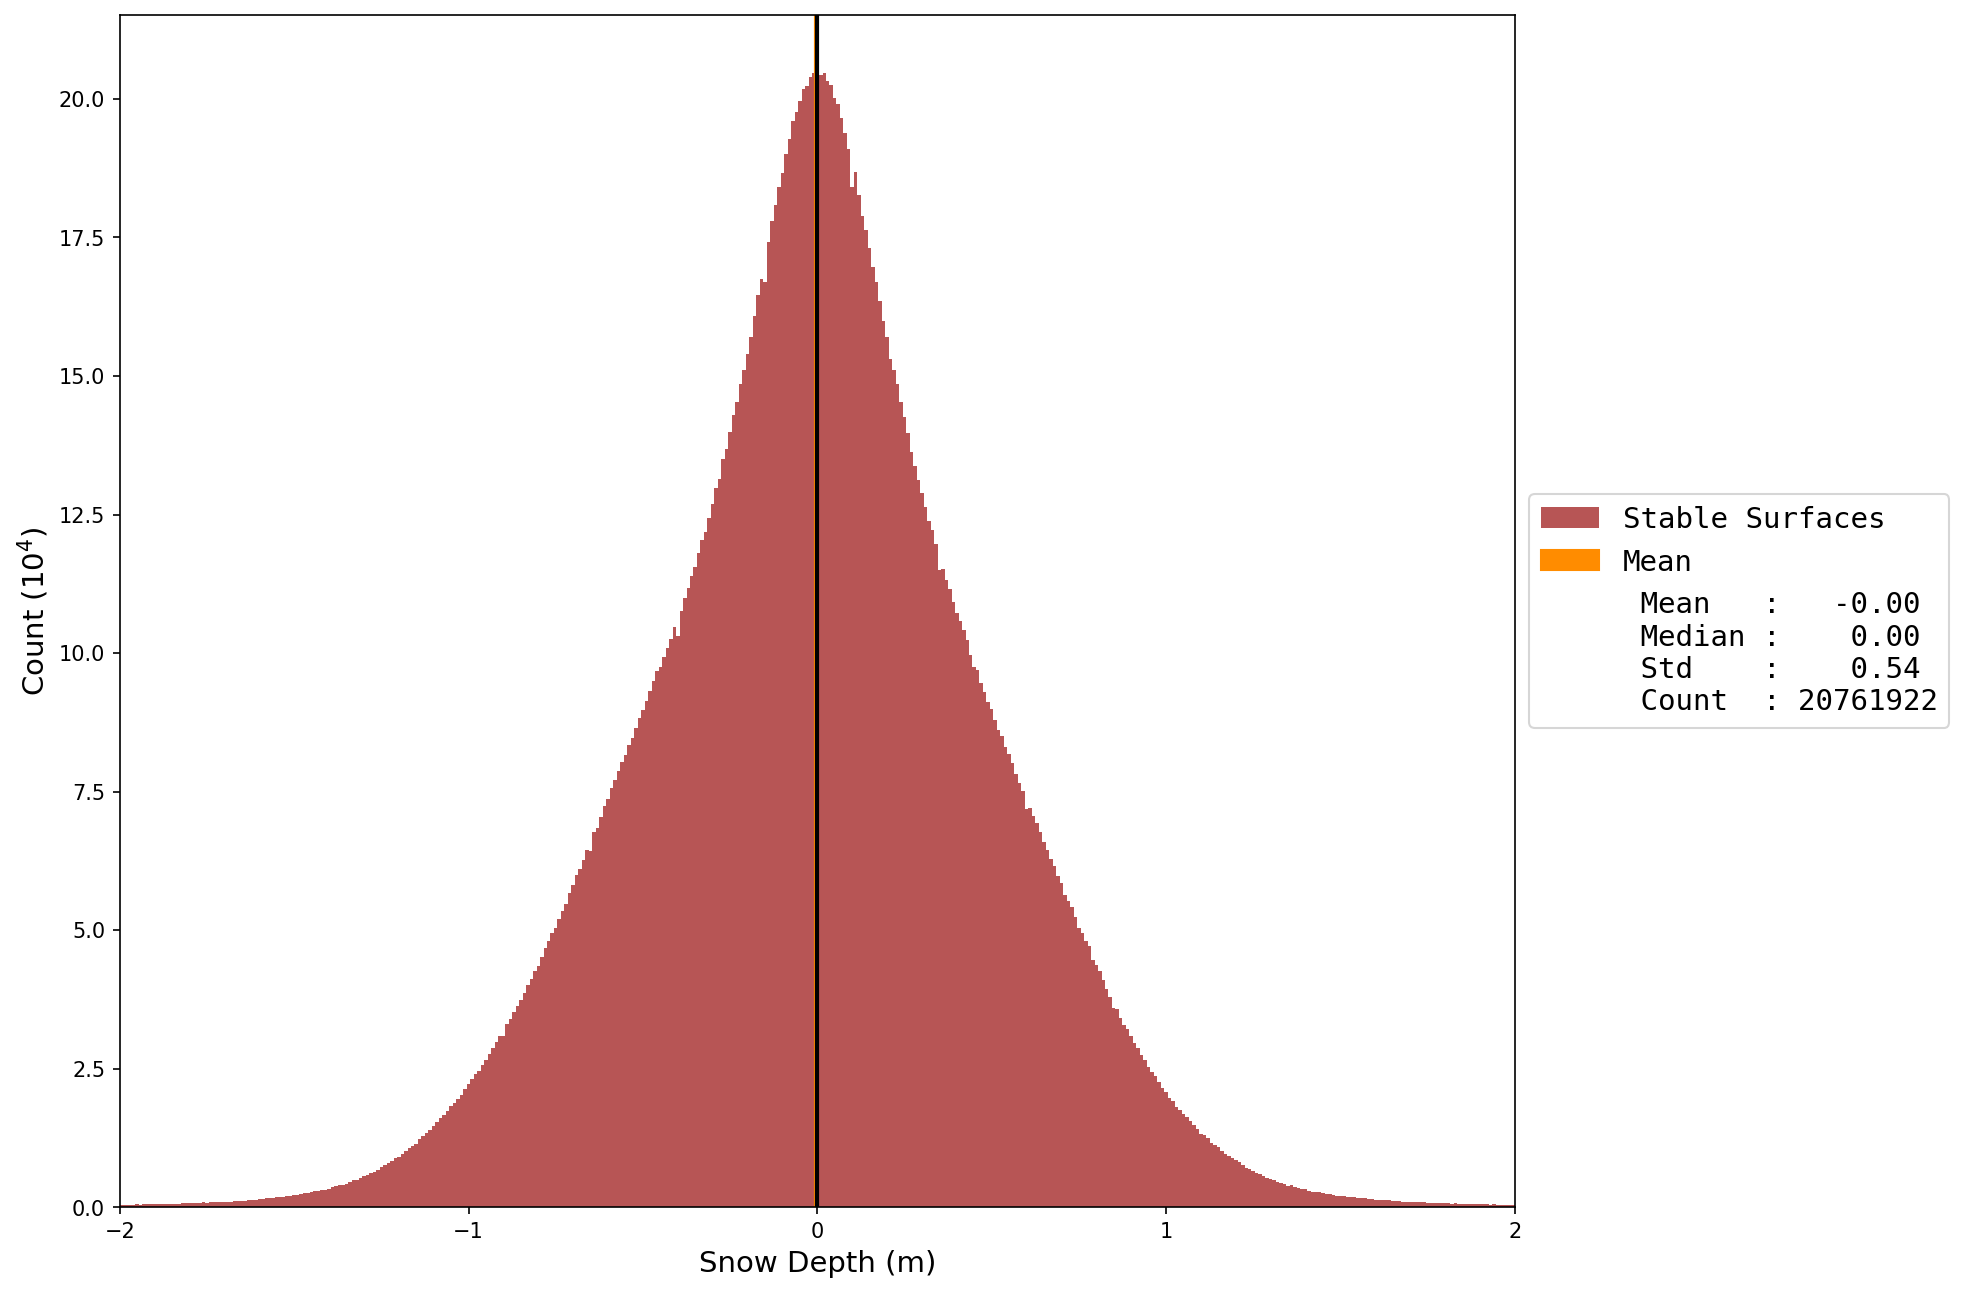

In [23]:
plot = plot_histogram(
    [{
        'data': stable_ground_snow_on,
        'label': 'Stable Surfaces',
        'color': 'brown',
    }],
    (-2, 2),
    **figure_style
)
with plot as ax:
     ax